In [13]:
import numpy as np, pandas as pd
import networkx as nx
from dowhy import gcm

pd.set_option('display.max_rows', 500)

In [14]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(500)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
5,8,96.0,0.0,0.0,6,12,2,686.0,1,16
6,8,85.0,0.0,0.0,6,12,2,615.0,1,16
7,8,85.0,0.0,0.0,6,12,2,649.0,1,16
8,8,98.0,0.0,0.0,6,12,2,724.0,1,16
9,8,74.0,0.0,0.0,6,12,2,559.0,1,16


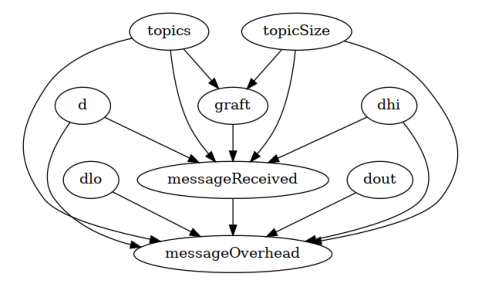

In [15]:
causal_graph = nx.read_adjlist("../1_Discovery/MessageOverhead/AdjLists/pcStable5s.adjlist", create_using=nx.DiGraph)
causal_graph.remove_node('prune')

G=gcm.util.plot(causal_graph, figure_size=[6, 8])

In [16]:
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, training_data)

In [17]:
gcm.fit(causal_model, training_data)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:10<00:00,  1.16s/it]      


In [19]:
samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: 6},
                                     num_samples_to_draw=1000)

samples.head(500)

,d,dlo,dhi,dout,topics,topicSize,graft,messageReceived,messageOverhead
0,6,8,7,2,24,6,0,-2,22
1,16,4,8,4,24,6,0,24,437
2,16,6,16,2,18,6,1,-2,-16
3,8,6,20,4,24,6,0,31,289
4,16,6,16,8,24,6,0,21,140
5,8,6,20,2,18,6,2,23,189
6,8,8,20,2,24,6,1,15,107
7,20,6,7,2,16,6,1,-2,-38
8,8,1,21,8,24,6,0,26,220
9,3,8,17,4,24,6,1,16,138


In [32]:
#Remove negatives
interventions = samples.loc[(samples['messageOverhead'] > 0) &  (samples['messageReceived'] > 0) & (samples['graft'] > 0) ]

interventions = interventions.loc[(interventions['d'] == 8) & (interventions['dlo'] == 6) & (interventions['dhi'] == 12) & (interventions['dout'] == 2)]
 
intervention = interventions.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()

intervention.head(100)

,,,,,,graft,messageReceived,messageOverhead
d,dlo,dhi,dout,topics,topicSize,,,
8,6,12,2,1,6,1.0,17.0,184.0


In [36]:
topicSizeIntervention = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18.19,20,21,22,23]
simulated = pd.DataFrame()

for i in topicSizeIntervention:
    samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: i},
                                     num_samples_to_draw=1000)
    interventions = samples.loc[(samples['messageOverhead'] > 0) &  (samples['messageReceived'] > 0) & (samples['graft'] > 0) ]
    interventions = interventions.loc[(interventions['d'] == 8) & (interventions['dlo'] == 6) & (interventions['dhi'] == 12) & (interventions['dout'] == 2)]
    intervention = interventions.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()
    
    simulated =  pd.concat([simulated, intervention])
    
    
simulated.head(100)

graft  messageReceived  messageOverhead
d dlo dhi dout topics topicSize                                         
8 6   12  2    24     1.00         1.0             29.0            320.0
               1      2.00         2.0             22.0            127.0
                      4.00         2.0             54.0            405.0
               24     4.00         1.0             27.0            214.0
               16     5.00         2.0             20.0            113.0
               1      6.00         2.0             13.5             97.0
                      7.00         2.0             26.0            231.0
               16     7.00         1.0             40.0            378.0
               1      8.00         1.0             30.0            234.0
               24     8.00         1.0             30.0            266.0
               1      10.00        1.0             93.0           1006.0
               16     10.00        2.0             98.0            767.0
               24     10.00        1.0             99.0            800.0
               18     11.00        2.0             85.0            614.0
               24     11.00        1.0             93.0            906.0
               16     12.00        2.0            116.0            892.0
               24     12.00        1.0            109.0            867.0
               1      13.00        1.0             98.0            774.0
               24     13.00        1.0            103.0            828.0
               1      14.00        1.5            113.0            826.0
               16     14.00        1.0             85.0            683.0
               17     14.00        2.0             97.0            467.0
               24     14.00        1.0             84.0            710.0
               16     15.00        1.0            119.0            920.0
               24     15.00        1.0             98.0            800.0
               1      16.00        2.0             96.0            816.0
               16     16.00        2.0            101.0            818.0
               1      17.00        3.0             97.0            754.0
               16     17.00        2.0            151.0           1167.0
               1      18.19        2.0             76.0            581.0
               16     18.19        2.0             53.0            382.0
               24     18.19        1.0             65.0            567.0
               1      20.00        2.0             77.0            652.0
               18     20.00        2.0            111.0            850.0
               24     20.00        1.0             81.0            664.0
               16     21.00        2.0             94.0            670.0
               1      23.00        2.0             73.0            453.0
               16     23.00        2.0            108.0           1021.0
               18     23.00        1.0             77.0            415.0